# Wine Quality Dataset

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing Concrete Compressive Strength Dataset
dataset = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/regression-models/Wine Quality/data/winequality-red.csv',sep=";",header=1)
data = pd.DataFrame(dataset)

X = data.iloc[:, :11].values
Y = data.iloc[:, 11].values

print(data)
print(X.shape)
print(Y.shape)

       7.4    0.7     0  1.9  0.076    11    34   0.9978  3.51  0.56   9.4  5
0      7.8  0.880  0.00  2.6  0.098  25.0  67.0  0.99680  3.20  0.68   9.8  5
1      7.8  0.760  0.04  2.3  0.092  15.0  54.0  0.99700  3.26  0.65   9.8  5
2     11.2  0.280  0.56  1.9  0.075  17.0  60.0  0.99800  3.16  0.58   9.8  6
3      7.4  0.700  0.00  1.9  0.076  11.0  34.0  0.99780  3.51  0.56   9.4  5
4      7.4  0.660  0.00  1.8  0.075  13.0  40.0  0.99780  3.51  0.56   9.4  5
...    ...    ...   ...  ...    ...   ...   ...      ...   ...   ...   ... ..
1593   6.2  0.600  0.08  2.0  0.090  32.0  44.0  0.99490  3.45  0.58  10.5  5
1594   5.9  0.550  0.10  2.2  0.062  39.0  51.0  0.99512  3.52  0.76  11.2  6
1595   6.3  0.510  0.13  2.3  0.076  29.0  40.0  0.99574  3.42  0.75  11.0  6
1596   5.9  0.645  0.12  2.0  0.075  32.0  44.0  0.99547  3.57  0.71  10.2  5
1597   6.0  0.310  0.47  3.6  0.067  18.0  42.0  0.99549  3.39  0.66  11.0  6

[1598 rows x 12 columns]
(1598, 11)
(1598,)


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 12 columns):
7.4       1598 non-null float64
0.7       1598 non-null float64
0         1598 non-null float64
1.9       1598 non-null float64
0.076     1598 non-null float64
11        1598 non-null float64
34        1598 non-null float64
0.9978    1598 non-null float64
3.51      1598 non-null float64
0.56      1598 non-null float64
9.4       1598 non-null float64
5         1598 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give less accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression','MLPRegressor']
models = [SVR(gamma='scale', C=1.0, epsilon=0.2),
          DecisionTreeRegressor(random_state=0),
          RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100),
          AdaBoostRegressor(random_state=0, n_estimators=100),
          GaussianProcessRegressor(kernel=kernel,random_state=0),
          LinearRegression(),
          MLPRegressor(hidden_layer_sizes=(500, ), activation='relu', solver='adam')]

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = r2_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for SVR: 37.14888450363302
Accuracy for DecisionTreeRegressor: -8.442728442728464
Accuracy for RandomForestRegressor: 31.646926908790796
Accuracy for AdaBoostRegressor: 34.26155651079475
Accuracy for GaussianProcessRegressor: 34.46889923084283
Accuracy for LinearRegression: 34.37312171353861
Accuracy for MLPRegressor: 34.241359515318756


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Wine Quality Dataset model accuracy')

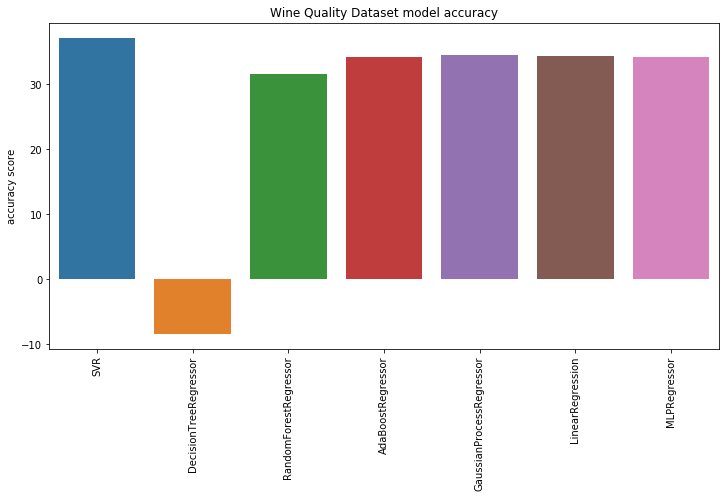

In [9]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Wine Quality Dataset model accuracy')